# Introduction

This content has Biomechanical Feautures of orthopedic patiens dataset. Humans's bimechanicals has a a lot of feaure that you can see features below.

The training processes was implemented with, 

  * Logistic Regression
  * K neirest neighbor Classification
  * Linear SVM
  * Decision Tree Classification
  * Random Forest Classification
  * Naive Bayes Classifications.

# Features 

* pelvic_incidence         
* pelvic_tilt numeric      
* lumbar_lordosis_angle     
* sacral_slope              
* pelvic_radius             
* degree_spondylolisthesis  
* class(label)

## Content 

* Load to data 
* Trying to understand data 
* Feature engineering 
  * Analyze the correlation between features 
    * lumbar_lordosis_angle and pelvic_incidence 
    * degree_spondylolisthesis and pelvic_incidence 
    * pelvic_tilt_number and pelvic_incidence 
    * lumbar_lordosis_angle and sacral_slope 
* Train and test splitting processes
  * Decleration variabels for splitting processes
  * Encoding labels(object to int64) with label encoding method
  * Test and train splitting
* Normalization for numerical values 
* Learning time!
  * Logistic Regression
  * K neirest neighbor Classification
  * Linear SVM
  * Decision Tree Classification
  * Random Forest Classification
  * Naive Bayes Classification
* Compare the learning algorithms
  * Visualization part
  * Confusion matrixes

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('dark')
import warnings 
warnings.filterwarnings('ignore')

## Load data 

In [59]:
data = pd.read_csv('column_2C_weka.csv')

## Trying to understand data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

## Feature engineering

### Analyze the correlation between features

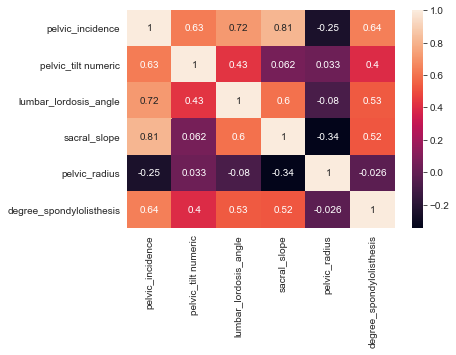

In [6]:
sns.heatmap(data.corr() , annot = True)
plt.show()

* As we can see the correlation table, the features that who has relation with the other features.
* The best correlation features that between sacral_slope and pelvic_incidence(0.82 point by 1).
* After that respectively correlation number that higher than 0.60 points 
  
  * lumbar_lordosis_angle and pelvic_incidence(0.72),
  * degree_spondylolisthesis and pelvic_incidence(0.64), 
  * pelvic_tilt_number and pelvic_incidence(0.63), 
  * lumbar_lordosis_angle and sacral_slope(0.60)

* The features directly proportional.

#### lumbar_lordosis_angle and pelvic_incidence 

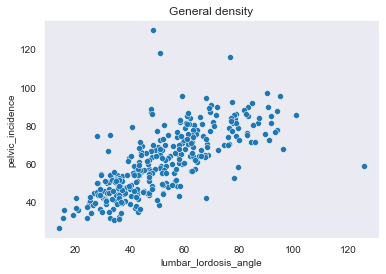

In [7]:
# visualization by general density 
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'pelvic_incidence' , data = data)
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('pelvic_incidence')
plt.title('General density')
plt.show()

* As we can see general density with these features directly proportional. 
  * It is avaliable for regression models that we can see density

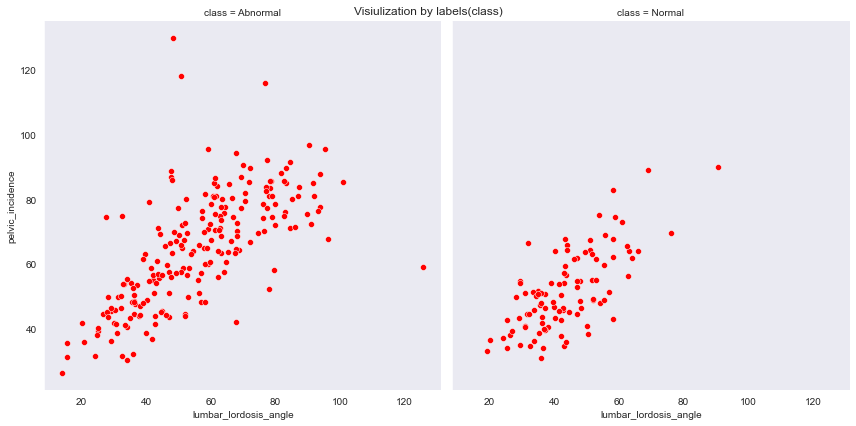

In [8]:
# visiulization by labels(class)
g = sns.FacetGrid(data , col = 'class' , size = 6)
g.map(sns.scatterplot , 'lumbar_lordosis_angle' , 'pelvic_incidence' , color = 'red') 
g.fig.suptitle('Visiulization by labels(class)')
plt.show()

* As we can see in section abnormal has a some marjin values that case is not good for regression models 

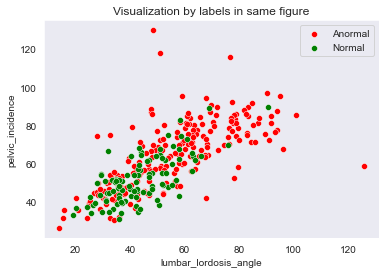

In [9]:
# visualization by labels in same figure 
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Abnormal'] , label = 'Anormal' , color = 'red')
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Normal'] , label = 'Normal' , color = 'green')
plt.title('Visualization by labels in same figure')
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('pelvic_incidence')
plt.legend(loc = 'best')
plt.show()

* As we can see the people who has a normal biomechanical feature has no 70 higher than pelvic_incidence. 
* We can see the density that in figure for normal people who has a normal biomechanical feature.
* Normal people feature, aggregated at small values of the coordinator plane.
* But some exceptions in this analyz and its not good for knn algorithms 

#### degree_spondylolisthesis and pelvic_incidence 

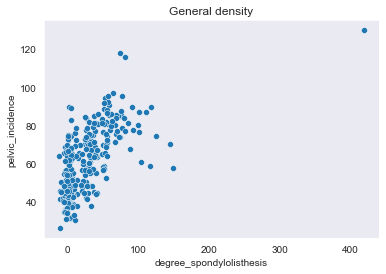

In [10]:
# visualization by general density 
sns.scatterplot(x = 'degree_spondylolisthesis' , y = 'pelvic_incidence' , data = data)
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('pelvic_incidence')
plt.title('General density')
plt.show()

* As we can see general density with these features directly proportional
* But also has some marjin values the values that are outlier values probably  

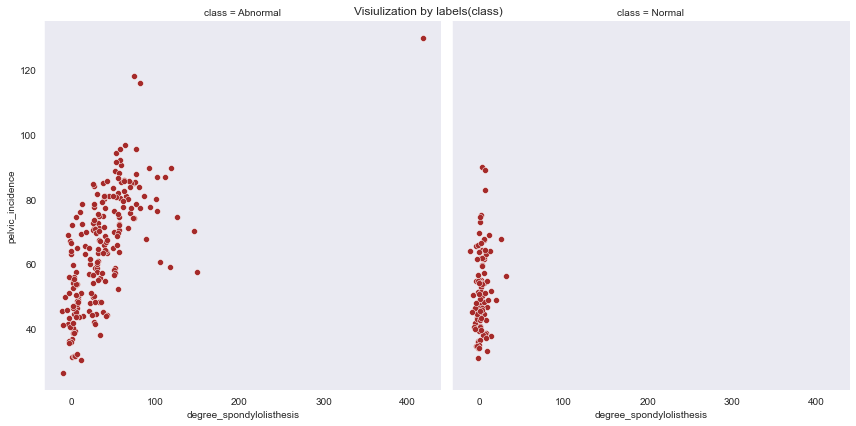

In [11]:
# visiulization by labels(class)
g = sns.FacetGrid(data , col = 'class' , size = 6)
g.map(sns.scatterplot , 'degree_spondylolisthesis' , 'pelvic_incidence' , color = 'brown') 
g.fig.suptitle('Visiulization by labels(class)')
plt.show()

* As we can see normal people features correlation better than anormal people.

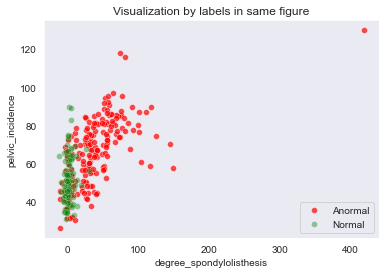

In [12]:
# visualization by labels in same figure 
sns.scatterplot(x = 'degree_spondylolisthesis' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Abnormal'] , label = 'Anormal' , color = 'red' , alpha = 0.7)
sns.scatterplot(x = 'degree_spondylolisthesis' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Normal'] , label = 'Normal' , color = 'green' , alpha = 0.4)
plt.title('Visualization by labels in same figure')
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('pelvic_incidence')
plt.legend(loc = 'best')
plt.show()

* We can see normal people density see clearly 
* Normal people people's features stuck in small space according to Anormal 

#### pelvic_tilt_number and pelvic_incidence 

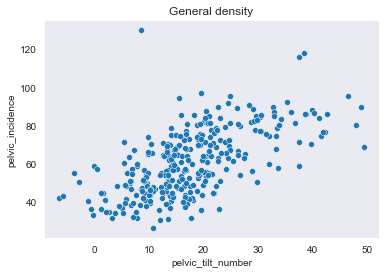

In [13]:
# visualization by general density 
sns.scatterplot(x = 'pelvic_tilt numeric' , y = 'pelvic_incidence' , data = data)
plt.xlabel('pelvic_tilt_number')
plt.ylabel('pelvic_incidence')
plt.title('General density')
plt.show()

* The data normal distribution and it is good for learning regression learning algorithms
* The data has some exceptions the exception that are outlier values in data probably.

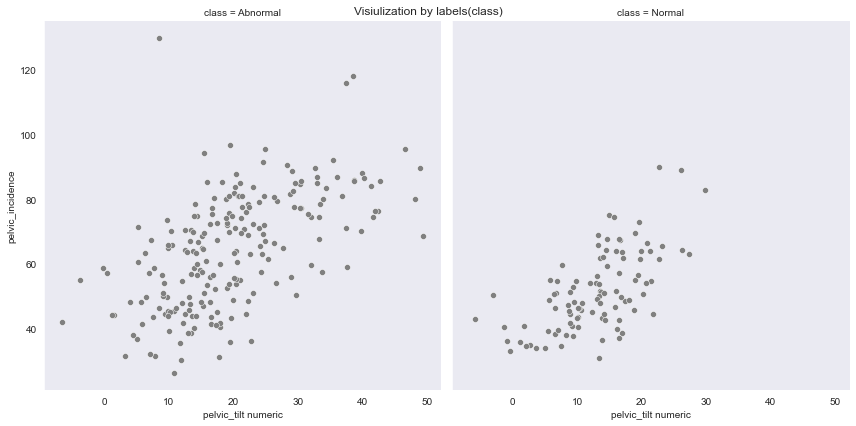

In [14]:
# visiulization by labels(class)
g = sns.FacetGrid(data , col = 'class' , size = 6)
g.map(sns.scatterplot , 'pelvic_tilt numeric' , 'pelvic_incidence' , color = 'gray') 
g.fig.suptitle('Visiulization by labels(class)')
plt.show()

* Anormal people feature's normal distribution  more that Normal people

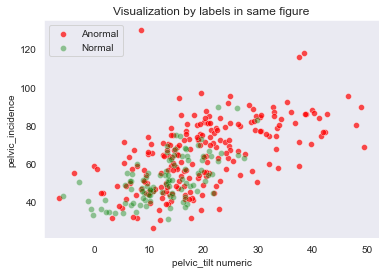

In [15]:
# visualization by labels in same figure 
sns.scatterplot(x = 'pelvic_tilt numeric' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Abnormal'] , label = 'Anormal' , color = 'red' , alpha = 0.7)
sns.scatterplot(x = 'pelvic_tilt numeric' , y = 'pelvic_incidence' , 
                data = data[data['class'] == 'Normal'] , label = 'Normal' , color = 'green' , alpha = 0.4)
plt.title('Visualization by labels in same figure')
plt.xlabel('pelvic_tilt numeric')
plt.ylabel('pelvic_incidence')
plt.legend(loc = 'best')
plt.show()

* Normal people stuck at certain values for example for pelvic_tilt number 7 - 30 

#### lumbar_lordosis_angle and sacral_slope 

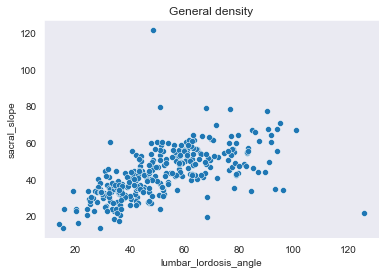

In [16]:
# visualization by general density 
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'sacral_slope' , data = data)
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('sacral_slope')
plt.title('General density')
plt.show()

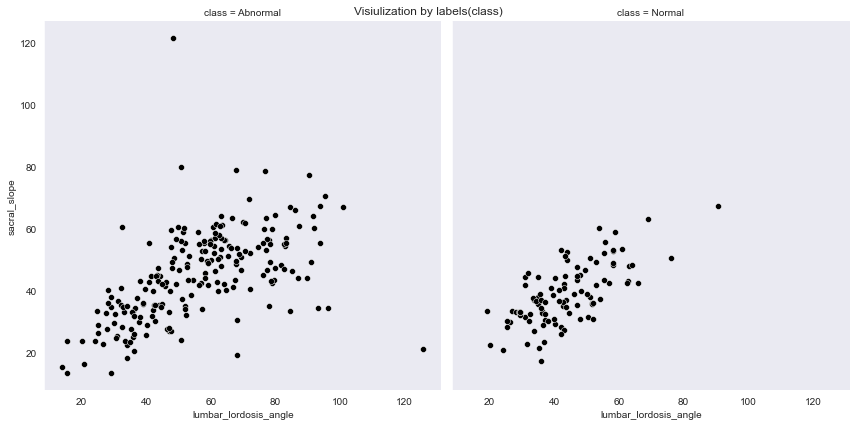

In [17]:
# visiulization by labels(class)
g = sns.FacetGrid(data , col = 'class' , size = 6)
g.map(sns.scatterplot , 'lumbar_lordosis_angle' , 'sacral_slope' , color = 'black') 
g.fig.suptitle('Visiulization by labels(class)')
plt.show()

* Normal people correlation better than anormal people

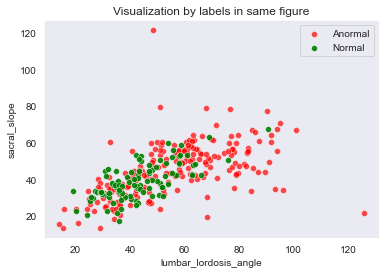

In [18]:
# visualization by labels in same figure 
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'sacral_slope' , 
                data = data[data['class'] == 'Abnormal'] , label = 'Anormal' , color = 'red' , alpha = 0.7)
sns.scatterplot(x = 'lumbar_lordosis_angle' , y = 'sacral_slope' , 
                data = data[data['class'] == 'Normal'] , label = 'Normal' , color = 'green' , alpha = 0.9)
plt.title('Visualization by labels in same figure')
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('sacral_slope')
plt.legend(loc = 'best')
plt.show()

## Train and test splitting for learning processes

### Declaration variables for splitting processes

In [63]:
# declaration for splitting processes
X = data.drop(['class'] , axis = 1).values

### Encoding labels(object to int64) with label encoding method

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:,6] = le.fit_transform(data.iloc[:,6])

In [65]:
# after the encoding processes declerate variable for labels
y = data['class'].values 

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Normalization for numerical values 

In [68]:
# Normalization processes
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [70]:
X

array([[0.17245293, 0.07823712, 0.11794029, 0.11995638, 0.25542545,
        0.02514839],
       [0.11665499, 0.04915994, 0.08396986, 0.09323562, 0.29204664,
        0.03636497],
       [0.18596361, 0.07745941, 0.14234216, 0.13424476, 0.27244639,
        0.0175229 ],
       ...,
       [0.16877226, 0.07856855, 0.13321312, 0.11594428, 0.31826932,
        0.01943732],
       [0.13107729, 0.04597597, 0.12253527, 0.11084188, 0.30168445,
        0.02624045],
       [0.1045151 , 0.0375515 , 0.11103182, 0.09270417, 0.31425285,
        0.02527676]])

### Test and train splitting

In [71]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

## Learning time!

#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
print('Logistic Regression score : ' , lr.score(X_test , y_test))
lr_score = lr.score(X_test , y_test)

Logistic Regression score :  0.7096774193548387


### Knn classification

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train , y_train)
print('Knn score' , knn.score(X_test , y_test))
knn_score = knn.score(X_test , y_test)

Knn score 0.8548387096774194


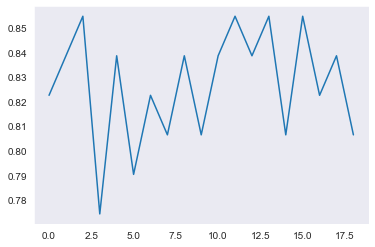

In [74]:
score_list = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train , y_train)
    knn_score = knn.score(X_test , y_test)
    score_list.append(knn_score)

plt.plot(score_list)
plt.show()

* As we can see we have best score in 16 neighbors 

### Linear SVM Classification

In [75]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train , y_train)
print('Linear SVM score : ' , svm.score(X_test , y_test))
svm_score = svm.score(X_test , y_test)

Linear SVM score :  0.8064516129032258


### Decision Tree Classification

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
print('Decision Tree score : ' , dt.score(X_test , y_test))
dt_score = dt.score(X_test , y_test)

Decision Tree score :  0.8064516129032258


### Random Forest Classification

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400 , random_state = 42)
rf.fit(X_train , y_train)
print('Acuracy wit Random forest :{}'.format(rf.score(X_test , y_test)))
rf_score = rf.score(X_test , y_test)

Acuracy wit Random forest :0.8064516129032258


### Naive Bayes Classification

In [78]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)
print('Acuracy Naive Bayes classification : {}'.format(nb.score(X_test , y_test)))
nb_score = nb.score(X_test , y_test)

Acuracy Naive Bayes classification : 0.7903225806451613


## Comparing Learning algorithms performs

### Visualization part

In [79]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
score_algorithms = [lr_score , nb_score , knn_score , svm_score , dt_score , rf_score]

In [80]:
# Creating new data frame for comparing visualaziton
df_score = pd.DataFrame({'Algorithms' : algorithms , 'Scores' : score_algorithms})

In [81]:
# Sorting 
index = df_score.Scores.sort_values(ascending = False).index
# reindexing
df_score = df_score.reindex(index)
df_score

,Algorithms,Scores
5,Random Forest Classification,0.806452
4,Decision Tree Classification,0.806452
3,Linear SVM Classification,0.806452
2,K neirest neighbor classification,0.806452
1,Naive Bayes Classification,0.790323
0,Logistic Regression,0.709677


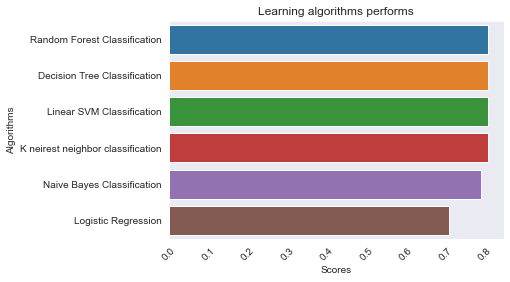

In [82]:
# Visualization part 
sns.barplot(x = 'Scores' , y = 'Algorithms' , data = df_score)
plt.xticks(rotation = 45)
plt.xlabel('Scores')
plt.ylabel('Algorithms')
plt.title('Learning algorithms performs')
plt.show()

### Confusion matrixes

In [83]:
# Logistic Regression predictions
y_pred_lr = lr.predict(X_test)

# Naive bayes predictions 
y_pred_nb = nb.predict(X_test)

# Knn predictions 
y_pred_knn = knn.predict(X_test)

# linear svm predictions 
y_pred_svm = svm.predict(X_test)

# Decision Tree predictions 
y_pred_dt = dt.predict(X_test)

# Random Forest predictions
y_pred_rf = rf.predict(X_test)

# True values 
y_true = y_test

In [85]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_pred_lr , y_true)
cm_nb = confusion_matrix(y_pred_nb , y_true)
cm_knn = confusion_matrix(y_pred_knn , y_true)
cm_svm = confusion_matrix(y_pred_svm , y_true)
cm_dt = confusion_matrix(y_pred_dt , y_true)
cm_rf = confusion_matrix(y_pred_rf , y_true)

In [86]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
cm = [cm_lr , cm_nb , cm_knn , cm_svm , cm_dt , cm_rf]

def confmatrix_visiulazation(cm , algorithms):
    for i,j in zip(cm,algorithms):
        plt.figure(figsize=(5,5)) 
        sns.heatmap(i , annot = True , linecolor = 'red' , fmt = '.0f')
        plt.xlabel('y_pred')
        plt.ylabel('y_test')
        plt.title('{} confusion map'.format(j))
        plt.show()

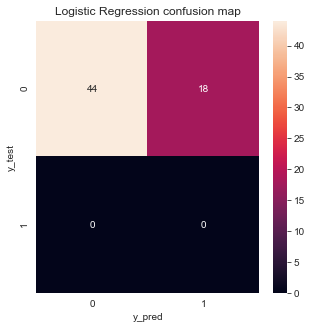

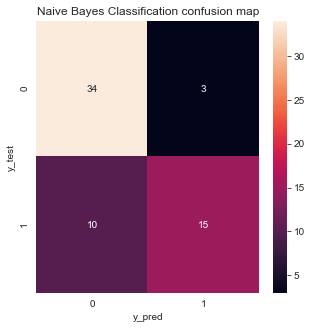

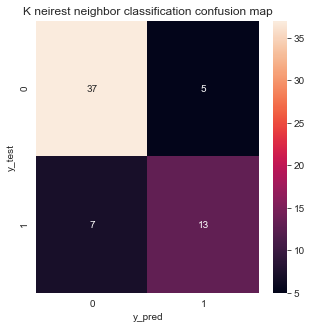

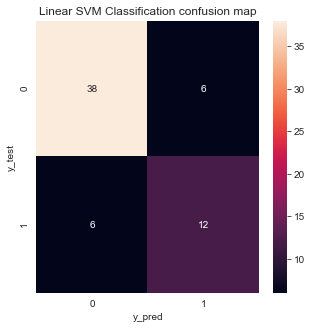

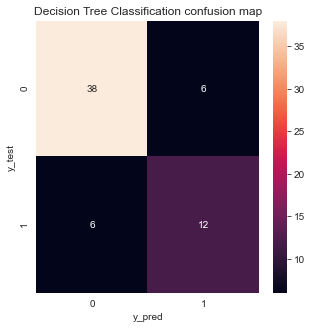

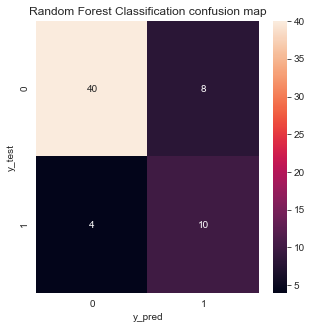

In [87]:
confmatrix_visiulazation(cm , algorithms)

* The data has no good perform with learning algorithms becasue 'degree_spondylolisthesis'feature has a minus value and this status is blocking the normalization process.